 # Time series prediction
 
 Predict kW 48 hours ahead of current time.
 
 In this data reading of meter is bi-hourly. We have to get houly reading in predictions. 
 
 For optimization, our prediction shold not be deviated more than ±5kWh.
 
 ## To Do
 
 1- Sampling (convert bi-hourly data into hourly data)
 
 2- Filling the Data (entering the missing values) ✔️
 
 3- Sorting the data timewise (Status: done) ✔️
 
 4- Analysis
 
 How to make Time_stamp indexed? ✔️
 
 How to fill hourly missing value using pandas? ✔️
 
 ### Sub To do
 
 1-Fill hourly missing value. ✔️
 
 2-Then mean the day values. ✔️

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#from plt import rcParams
#rcPramas['figure.figsize'] = 10, 6
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [84]:
#Other imports
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
from matplotlib import rc

%config InlineBackend.figure_format='retina'


sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
dataset = pd.read_csv("3098000032-Mar18-Mar19.csv")

In [4]:
dataset

,serial,kWh,kW,kVARh,kVAR,Time_stamp
0,3098000032,10.854,0.000,7.814,0.002,2018-03-01 15:30:00
1,3098000032,10.750,0.000,7.813,0.000,2018-03-01 14:30:00
2,3098000032,12.325,0.086,8.302,0.076,2018-03-05 09:00:00
3,3098000032,12.372,0.094,8.345,0.086,2018-03-05 09:30:00
4,3098000032,12.415,0.086,8.386,0.082,2018-03-05 10:00:00
...,...,...,...,...,...,...
17457,3098000032,6781.400,0.982,1721.240,0.406,2019-03-31 22:00:00
17458,3098000032,6781.920,1.040,1721.320,0.460,2019-03-31 22:30:00
17459,3098000032,6782.520,1.192,1721.390,0.498,2019-03-31 23:00:00
17460,3098000032,6783.120,0.000,1721.470,0.436,2019-03-31 23:30:00


In [5]:
dataset.describe()

,serial,kWh,kW,kVARh,kVAR
count,1.746200e+04,17462.000000,17462.000000,17462.000000,17462.000000
mean,3.098000e+09,2747.256710,0.750874,1006.527078,0.257706
std,0.000000e+00,1704.039572,1.097139,543.763389,0.247171
min,3.098000e+09,10.750000,0.000000,7.813000,0.000000
25%,3.098000e+09,1358.445000,0.100000,552.427750,0.080000
50%,3.098000e+09,2981.975000,0.212000,1160.990000,0.190000
75%,3.098000e+09,3670.370000,0.834000,1486.230000,0.366000
max,3.098000e+09,6783.840000,6.520000,1721.550000,1.532000


In [6]:
dataset.shape

(17462, 6)

In [7]:
dataset.dtypes

serial          int64
kWh           float64
kW            float64
kVARh         float64
kVAR          float64
Time_stamp     object
dtype: object

In [8]:
#For checking missing values in dataset
dataset.isna().sum()

serial        0
kWh           0
kW            0
kVARh         0
kVAR          0
Time_stamp    0
dtype: int64

dataset.kW.plot()

In [37]:
dataset['Time_stamp'] = pd.to_datetime(dataset['Time_stamp'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Time_stamp'])
df = pd.DataFrame(dataset, columns=['kW', 'Time_stamp'])

In [38]:
#df['Time'] = pd.to_datetime(dataset.Time_stamp)

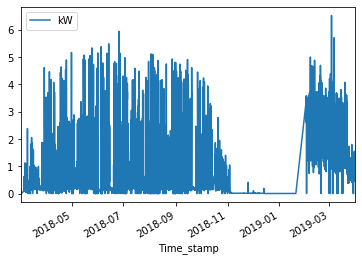

In [39]:
import matplotlib.pyplot as plt
df.plot(x='Time_stamp', y='kW', kind='line') 
plt.show()

In [40]:
#Number of time_stamp per month
df.Time_stamp.dt.month.value_counts()

3     2759
8     1462
5     1452
12    1440
4     1429
9     1427
11    1421
7     1413
10    1257
2     1239
6     1232
1      931
Name: Time_stamp, dtype: int64

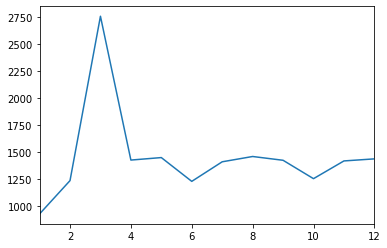

In [41]:
#Line plot of Number of time_stamp per month
df.Time_stamp.dt.month.value_counts().sort_index().plot()

In [42]:
df.Time_stamp.min()

Timestamp('2018-03-01 14:30:00')

In [43]:
df.Time_stamp.max()

Timestamp('2019-04-01 00:00:00')

In [44]:
df.loc[200:210]

,kW,Time_stamp
200,0.060,2018-03-09 10:30:00
201,0.254,2018-03-09 11:00:00
202,0.346,2018-03-09 11:30:00
203,0.344,2018-03-09 12:00:00
204,0.348,2018-03-09 12:30:00
205,0.354,2018-03-09 13:00:00
206,0.556,2018-03-09 13:30:00
207,0.252,2018-03-09 14:00:00
208,0.248,2018-03-09 14:30:00
209,0.278,2018-03-09 15:00:00


## Sorting w.r.t time
Status: Done

In [45]:
df.set_index('Time_stamp', inplace=True)

In [46]:
df.dtypes

kW    float64
dtype: object

In [47]:
#Sorting Time_wise

df = df.sort_values(['Time_stamp'])

In [48]:
df.shape

(17462, 1)

In [49]:
df

,kW
Time_stamp,
2018-03-01 14:30:00,0.000
2018-03-01 15:30:00,0.000
2018-03-01 16:30:00,0.138
2018-03-01 17:00:00,0.000
2018-03-02 11:30:00,0.000
...,...
2019-03-31 22:00:00,0.982
2019-03-31 22:30:00,1.040
2019-03-31 23:00:00,1.192


In [50]:
df.loc['2018-11-12 02:00:00':]

,kW
Time_stamp,
2018-11-12 02:00:00,0.012
2018-11-12 02:30:00,0.012
2018-11-12 03:00:00,0.014
2018-11-12 03:30:00,0.010
2018-11-12 04:00:00,0.014
...,...
2019-03-31 22:00:00,0.982
2019-03-31 22:30:00,1.040
2019-03-31 23:00:00,1.192


In [51]:
fd = df.loc['2018-11-01 15:30:00':]

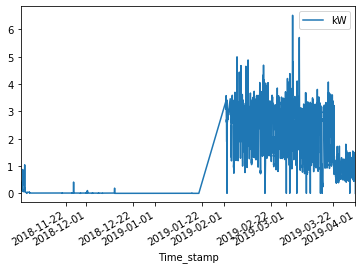

In [54]:
fd.plot()

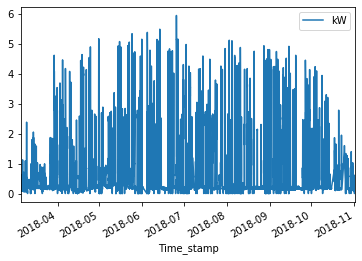

In [55]:
#Actual Data to work on.
df = df.loc['2018-03-05 09:00:00':'2018-11-01 15:30:00']
df.plot()

In [56]:
df.index

DatetimeIndex(['2018-03-05 09:00:00', '2018-03-05 09:30:00',
               '2018-03-05 10:00:00', '2018-03-05 10:30:00',
               '2018-03-05 11:00:00', '2018-03-05 11:30:00',
               '2018-03-05 12:00:00', '2018-03-05 12:30:00',
               '2018-03-05 13:00:00', '2018-03-05 13:30:00',
               ...
               '2018-11-01 11:00:00', '2018-11-01 11:30:00',
               '2018-11-01 12:00:00', '2018-11-01 12:30:00',
               '2018-11-01 13:00:00', '2018-11-01 13:30:00',
               '2018-11-01 14:00:00', '2018-11-01 14:30:00',
               '2018-11-01 15:00:00', '2018-11-01 15:30:00'],
              dtype='datetime64[ns]', name='Time_stamp', length=10972, freq=None)

In [57]:
df

,kW
Time_stamp,
2018-03-05 09:00:00,0.086
2018-03-05 09:30:00,0.094
2018-03-05 10:00:00,0.086
2018-03-05 10:30:00,0.090
2018-03-05 11:00:00,0.230
...,...
2018-11-01 13:30:00,0.552
2018-11-01 14:00:00,0.478
2018-11-01 14:30:00,0.424


## Feature Engineering

In [58]:
#Don't run this cell

#df['hour'] = df.index.hour
#df['day_of_month'] = df.index.day
#df['day_of_week'] = df.index.dayofweek
#df['month'] = df.index.month

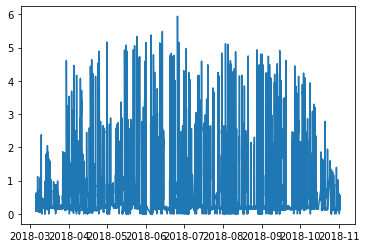

In [59]:
plt.plot(df)

In [74]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    #pd.rolling_mean(timeseries, window=3)
    rolstd = timeseries.rolling(window=3).std()
    #pd.rolling_std(timeseries, window=3)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

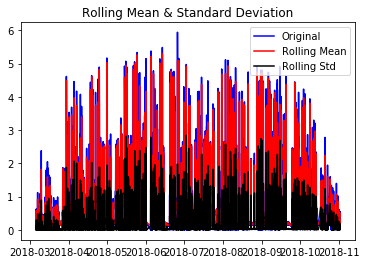

Results of Dickey-Fuller Test:
Test Statistic                -1.412829e+01
p-value                        2.358149e-26
#Lags Used                     3.900000e+01
Number of Observations Used    1.093200e+04
Critical Value (1%)           -3.430948e+00
Critical Value (5%)           -2.861804e+00
Critical Value (10%)          -2.566911e+00
dtype: float64


In [67]:
test_stationarity(df)


/home/asim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


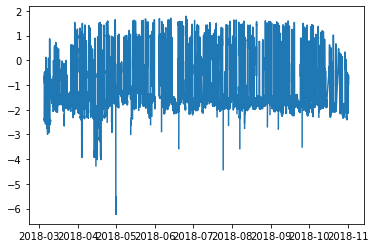

In [68]:
ts_log = np.log(df)
plt.plot(ts_log)

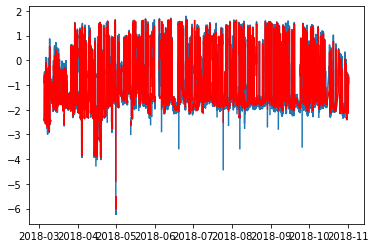

In [71]:
moving_avg = ts_log.rolling(window=3).mean()
#pd.rolling_mean(ts_log,3)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [72]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,kW
Time_stamp,
2018-03-05 09:00:00,NaN
2018-03-05 09:30:00,NaN
2018-03-05 10:00:00,-0.029649
2018-03-05 10:30:00,0.000659
2018-03-05 11:00:00,0.640667
2018-03-05 11:30:00,0.258428
2018-03-05 12:00:00,0.425432
2018-03-05 12:30:00,0.169739
2018-03-05 13:00:00,-0.028280


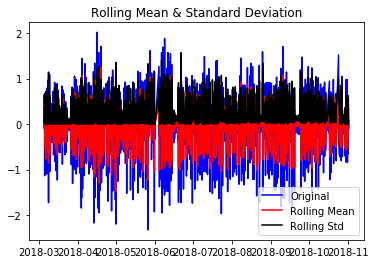

Results of Dickey-Fuller Test:
Test Statistic                   -30.416188
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10487.000000
Critical Value (1%)               -3.430974
Critical Value (5%)               -2.861816
Critical Value (10%)              -2.566917
dtype: float64


In [75]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

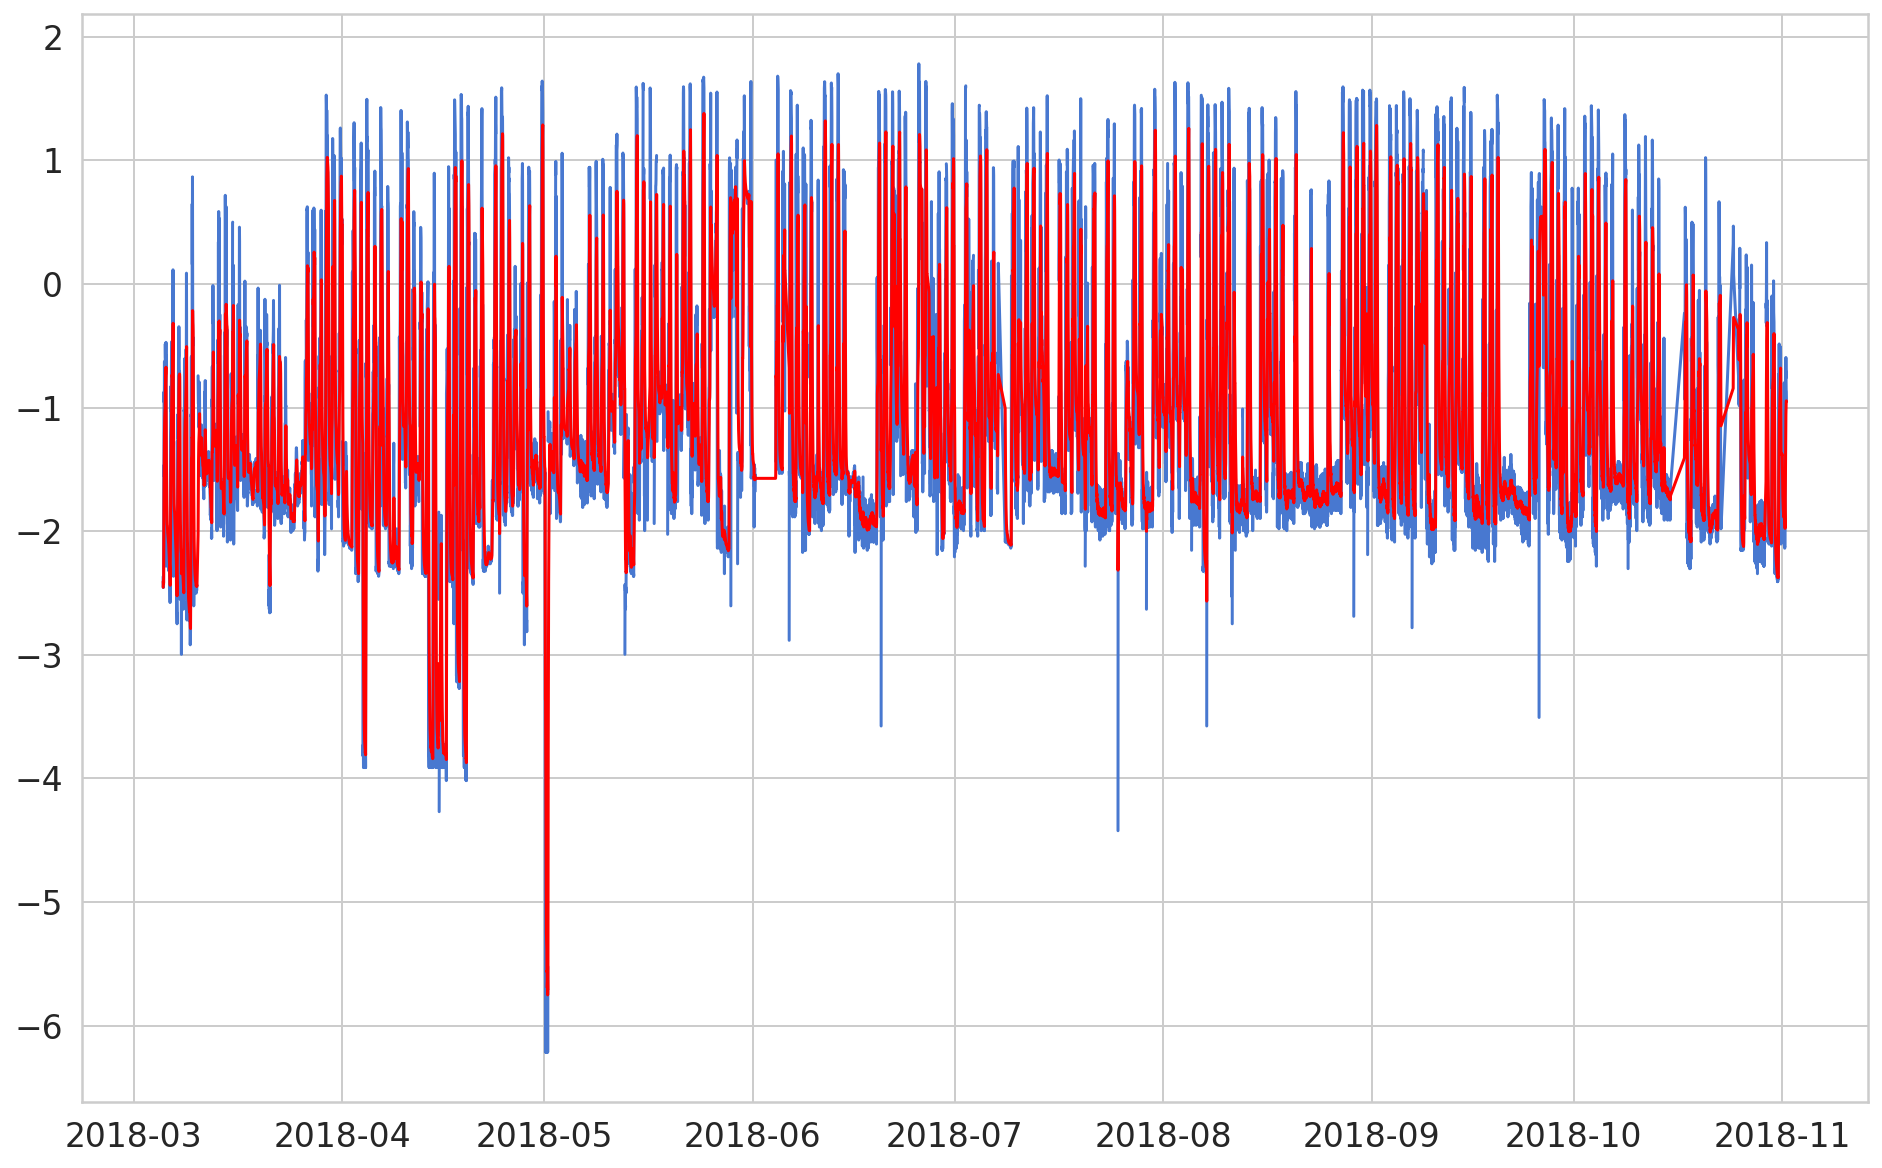

In [85]:
expwighted_avg = ts_log.ewm(halflife=3).mean()
#pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [86]:
#For checking missing values in dataset
ts_log_ewma_diff.isna().sum()

kW    0
dtype: int64

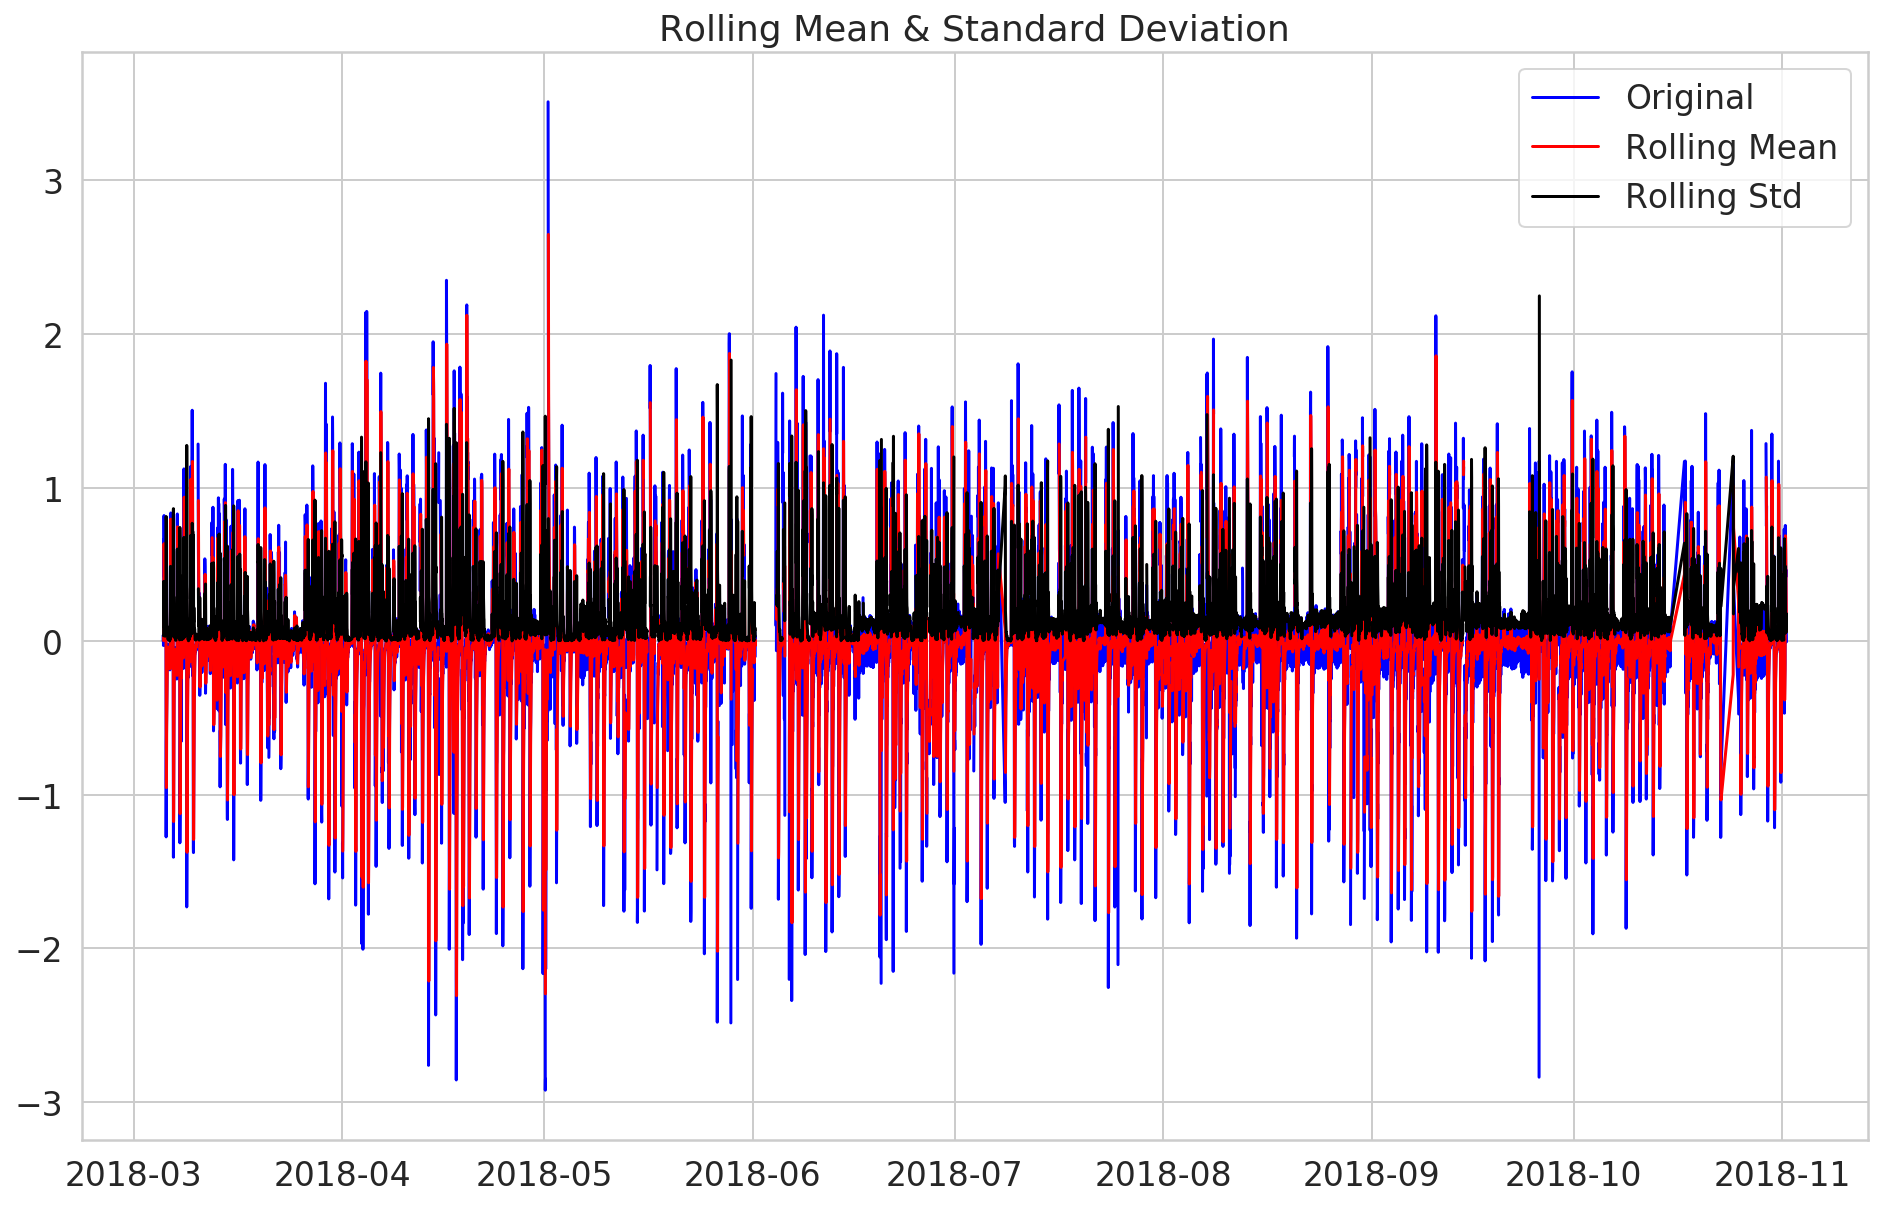

Results of Dickey-Fuller Test:


MissingDataError: exog contains inf or nans

In [88]:
ts_log_ewma_diff = ts_log - expwighted_avg
ts_log_ewma_diff = ts_log_ewma_diff.fillna(method='ffill')
test_stationarity(ts_log_ewma_diff)

In [ ]:
indexedDataset = indexedDataset.fillna(method='ffill')

### Rolling mean & Rolling statistics

In [25]:
#calculate rolling mean
rollmean = df.rolling(window=30).mean()

#Calculate standard deviation
rollstd = df.rolling(window=30).std()

print(rollmean, rollstd)

                           kW
Time_stamp                   
2018-03-05 09:00:00       NaN
2018-03-05 09:30:00       NaN
2018-03-05 10:00:00       NaN
2018-03-05 10:30:00       NaN
2018-03-05 11:00:00       NaN
...                       ...
2018-11-01 13:30:00  0.224600
2018-11-01 14:00:00  0.232133
2018-11-01 14:30:00  0.237933
2018-11-01 15:00:00  0.251933
2018-11-01 15:30:00  0.256333

[10972 rows x 1 columns]                            kW
Time_stamp                   
2018-03-05 09:00:00       NaN
2018-03-05 09:30:00       NaN
2018-03-05 10:00:00       NaN
2018-03-05 10:30:00       NaN
2018-03-05 11:00:00       NaN
...                       ...
2018-11-01 13:30:00  0.141065
2018-11-01 14:00:00  0.148422
2018-11-01 14:30:00  0.152488
2018-11-01 15:00:00  0.149133
2018-11-01 15:30:00  0.151130

[10972 rows x 1 columns]


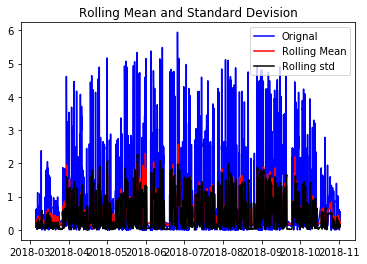

In [26]:
origin = plt.plot(df, color='blue', label="Orignal")
mean = plt.plot(rollmean, color='red', label="Rolling Mean")
std = plt.plot(rollstd, color='black', label="Rolling std")
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Devision')
plt.show(block=False)

In [27]:
#Dickey-Fuller Test
From statsmodels.tsa.stattools as adfuller

print("Dickey fuller test result:")
dftest = adfuller(df['kW'], autolag='AIC')

dfoutput = pd.Series(df, index=['Test statistic', 'p-value', '#Lags Used', 'Number of Observations used'])
for key, value in dftest.items():
    dfoutput['Critical Value (&s)'%key] = value
    
print(dfoutput)

SyntaxError: invalid syntax (<ipython-input-27-7602c3326a78>, line 2)

In [38]:
fd = df

In [29]:
fd


,kW
Time_stamp,
2018-03-05 09:00:00,0.086
2018-03-05 09:30:00,0.094
2018-03-05 10:00:00,0.086
2018-03-05 10:30:00,0.090
2018-03-05 11:00:00,0.230
...,...
2018-11-01 13:30:00,0.552
2018-11-01 14:00:00,0.478
2018-11-01 14:30:00,0.424


In [30]:
fd.interpolate(method ='linear', limit_direction ='forward') 

,kW
Time_stamp,
2018-03-05 09:00:00,0.086
2018-03-05 09:30:00,0.094
2018-03-05 10:00:00,0.086
2018-03-05 10:30:00,0.090
2018-03-05 11:00:00,0.230
...,...
2018-11-01 13:30:00,0.552
2018-11-01 14:00:00,0.478
2018-11-01 14:30:00,0.424


In [31]:
fd.fillna(method ='pad') 

,kW
Time_stamp,
2018-03-05 09:00:00,0.086
2018-03-05 09:30:00,0.094
2018-03-05 10:00:00,0.086
2018-03-05 10:30:00,0.090
2018-03-05 11:00:00,0.230
...,...
2018-11-01 13:30:00,0.552
2018-11-01 14:00:00,0.478
2018-11-01 14:30:00,0.424


In [32]:
fd.fillna(fd.mean())

,kW
Time_stamp,
2018-03-05 09:00:00,0.086
2018-03-05 09:30:00,0.094
2018-03-05 10:00:00,0.086
2018-03-05 10:30:00,0.090
2018-03-05 11:00:00,0.230
...,...
2018-11-01 13:30:00,0.552
2018-11-01 14:00:00,0.478
2018-11-01 14:30:00,0.424


### Data preprocessing

In [29]:
# Train test split
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

8777 2195


In [30]:
#Create dataset function for LSTM model

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [33]:


time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.kW, time_steps)
X_test, y_test = create_dataset(test, test.kW, time_steps)

print(X_train.shape, y_train.shape)

(8767, 10, 1) (8767,)


## LSTM Tensorflow

In [36]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
from matplotlib import rc

%config InlineBackend.figure_format='retina'


sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

### Modeling

In [37]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

### Training

In [45]:
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Train on 7890 samples, validate on 877 samples
Epoch 1/20
7890/7890 [==============================] - 7s 843us/sample - loss: 0.0484 - val_loss: 0.4812
Epoch 2/20
7890/7890 [==============================] - 6s 812us/sample - loss: 0.0460 - val_loss: 0.4879
Epoch 3/20
7890/7890 [==============================] - 7s 842us/sample - loss: 0.0441 - val_loss: 0.4909
Epoch 4/20
7890/7890 [==============================] - 6s 817us/sample - loss: 0.0505 - val_loss: 0.4847
Epoch 5/20
7890/7890 [==============================] - 6s 819us/sample - loss: 0.0510 - val_loss: 0.4908
Epoch 6/20
7890/7890 [==============================] - 7s 853us/sample - loss: 0.0457 - val_loss: 0.5075
Epoch 7/20
7890/7890 [==============================] - 7s 931us/sample - loss: 0.0446 - val_loss: 0.5058
Epoch 8/20
7890/7890 [==============================] - 7s 846us/sample - loss: 0.0509 - val_loss: 0.5178
Epoch 9/20
7890/7890 [==============================] - 7s 859us/sample - loss: 0.0457 - val_loss: 0.4991

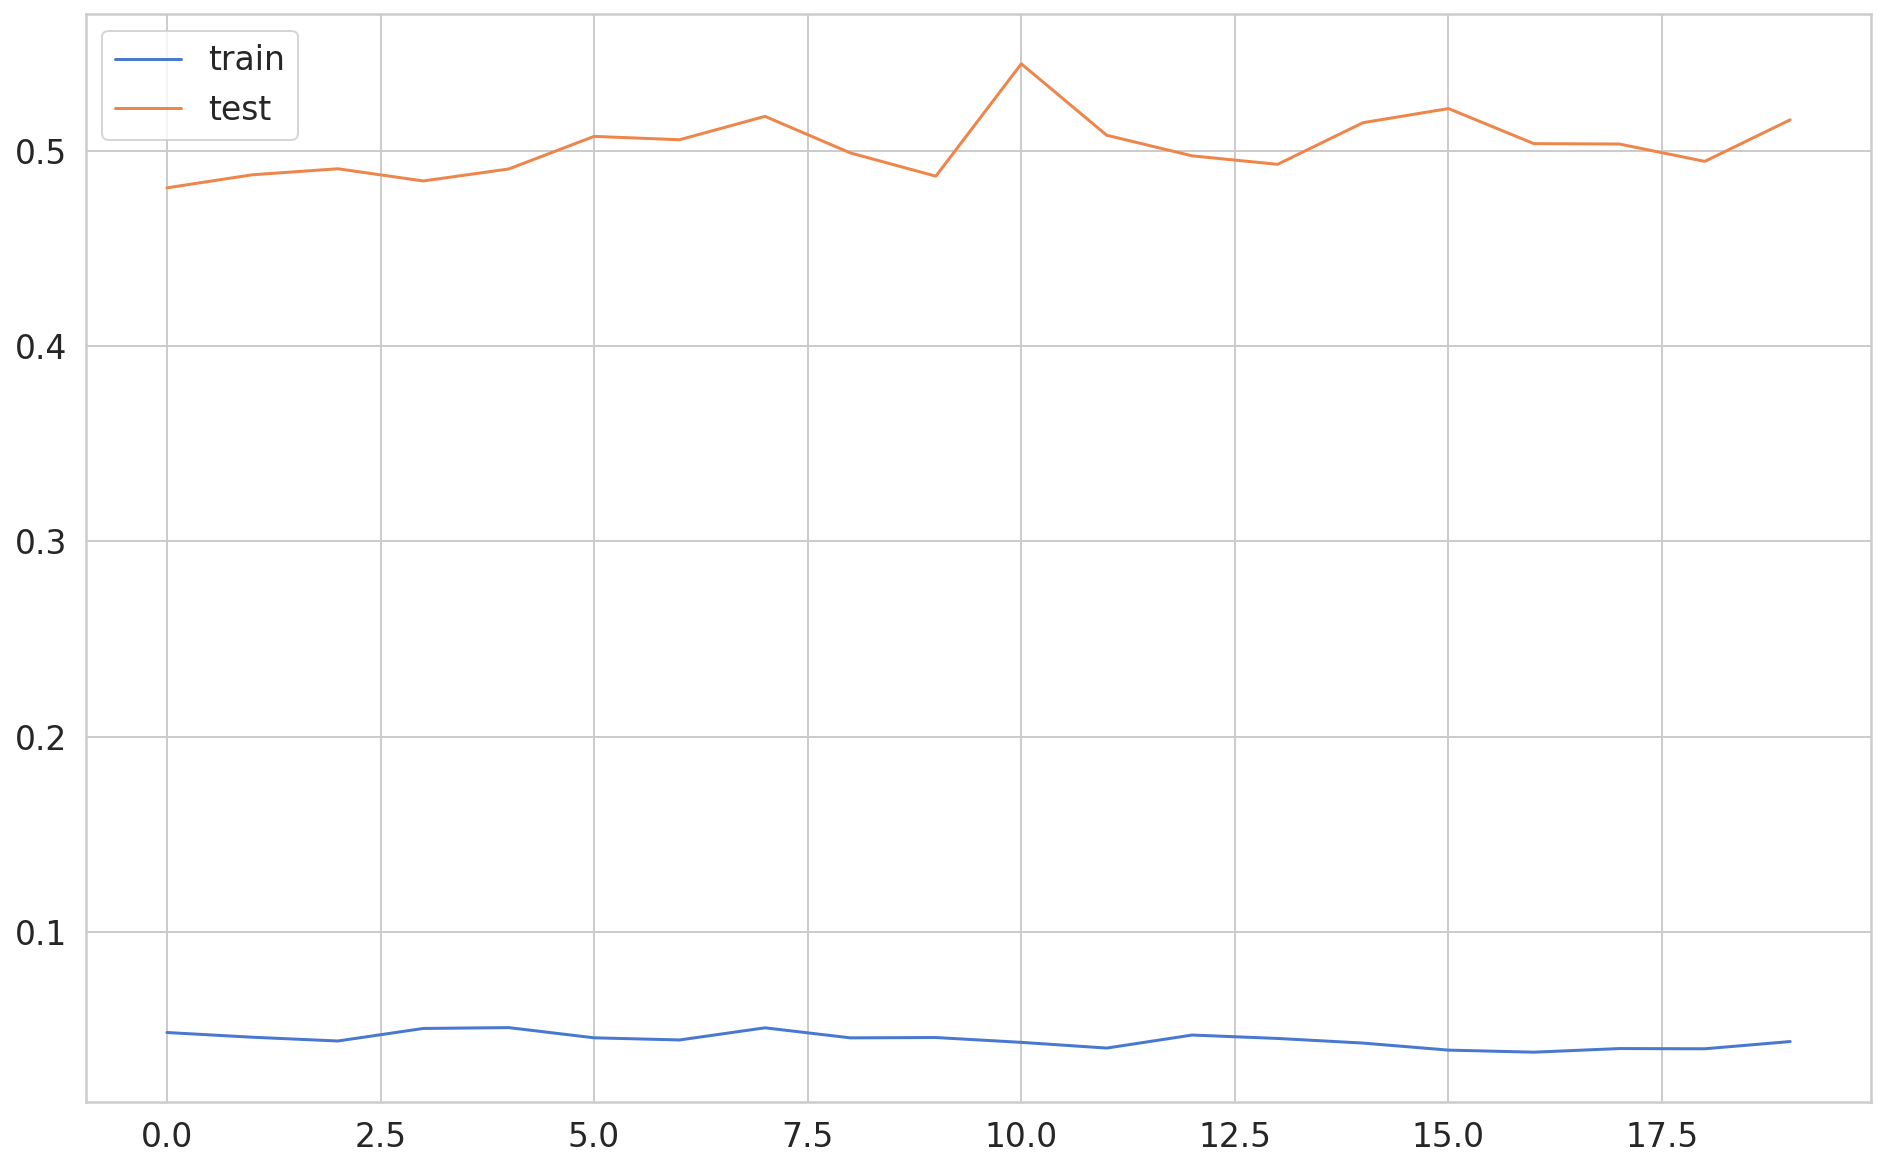

In [46]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [47]:
y_pred = model.predict(X_test)

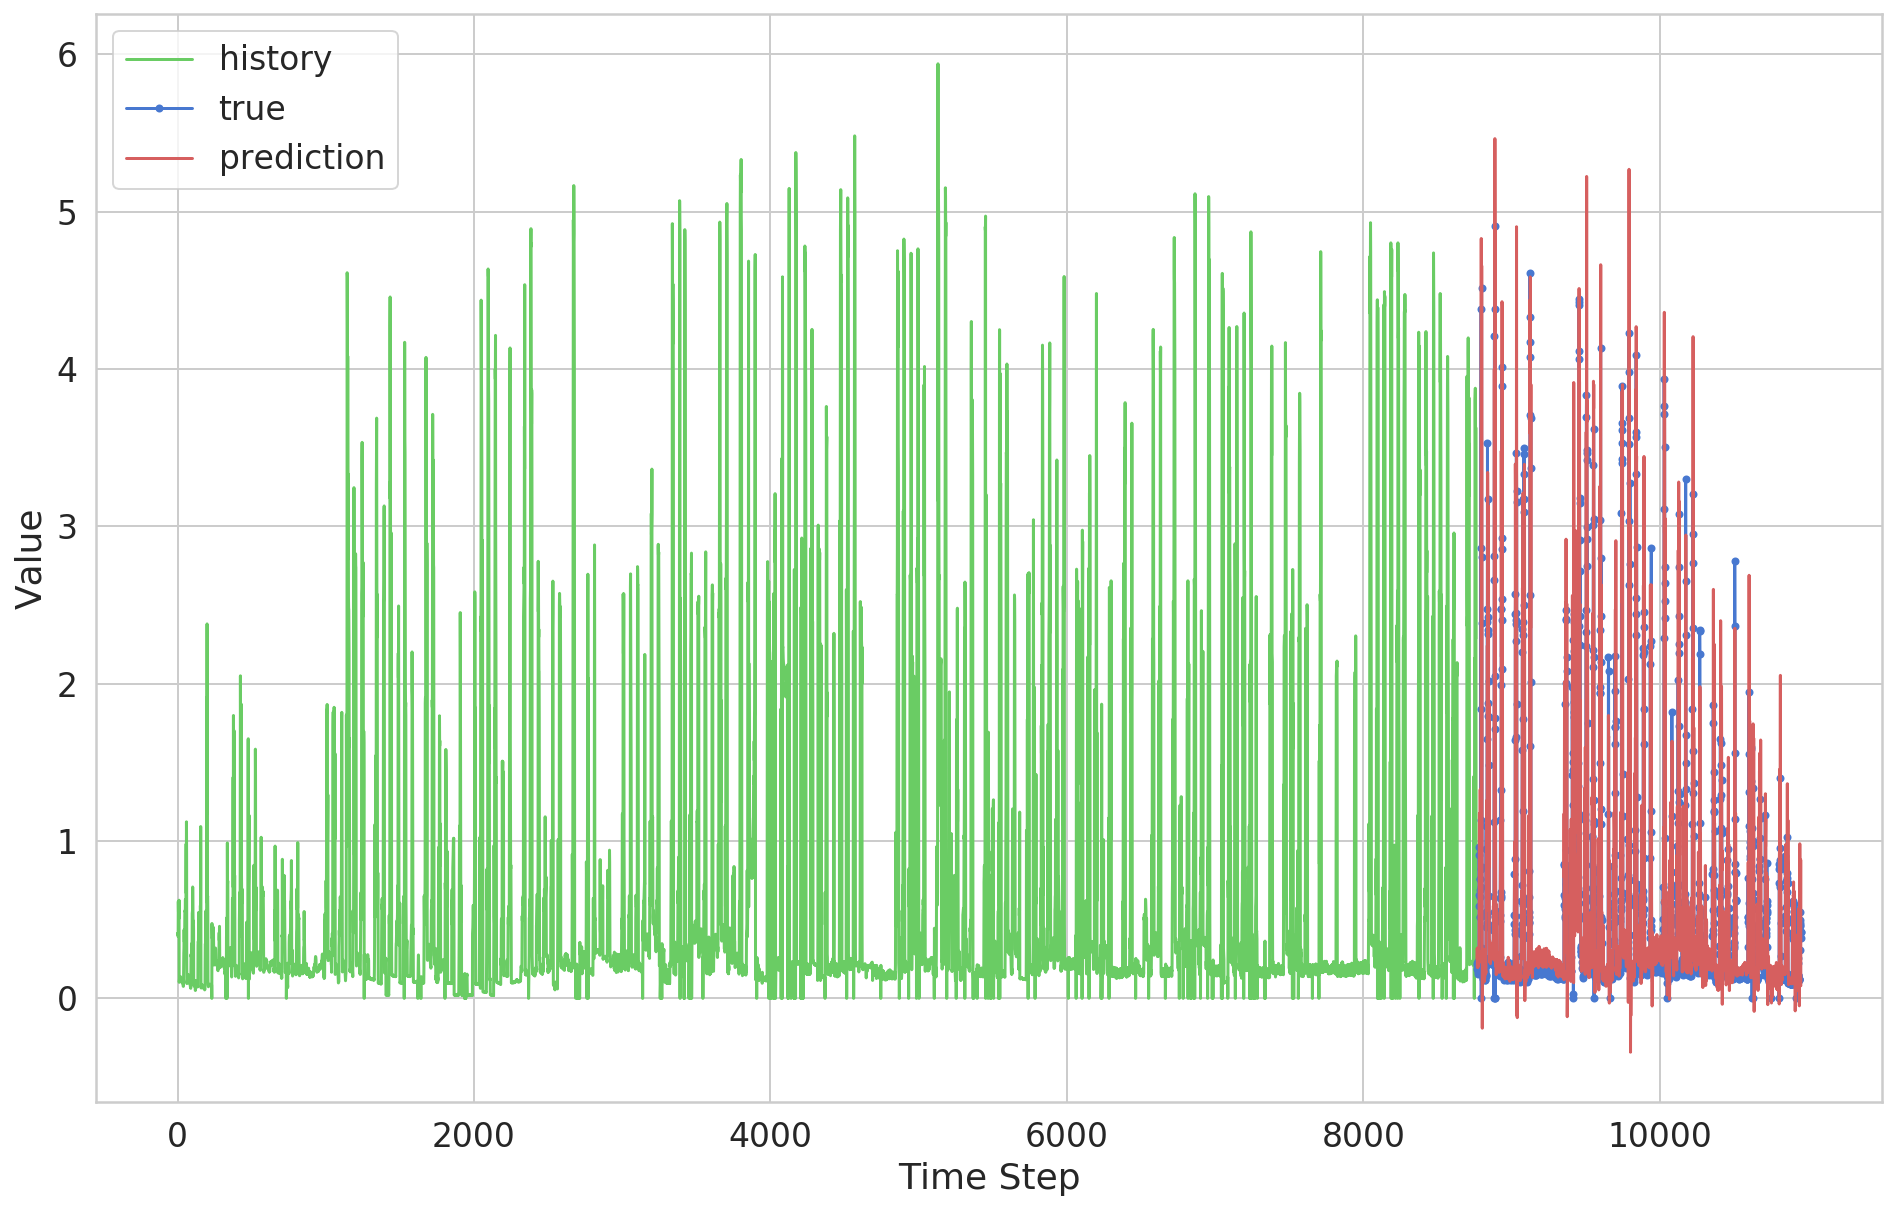

In [48]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

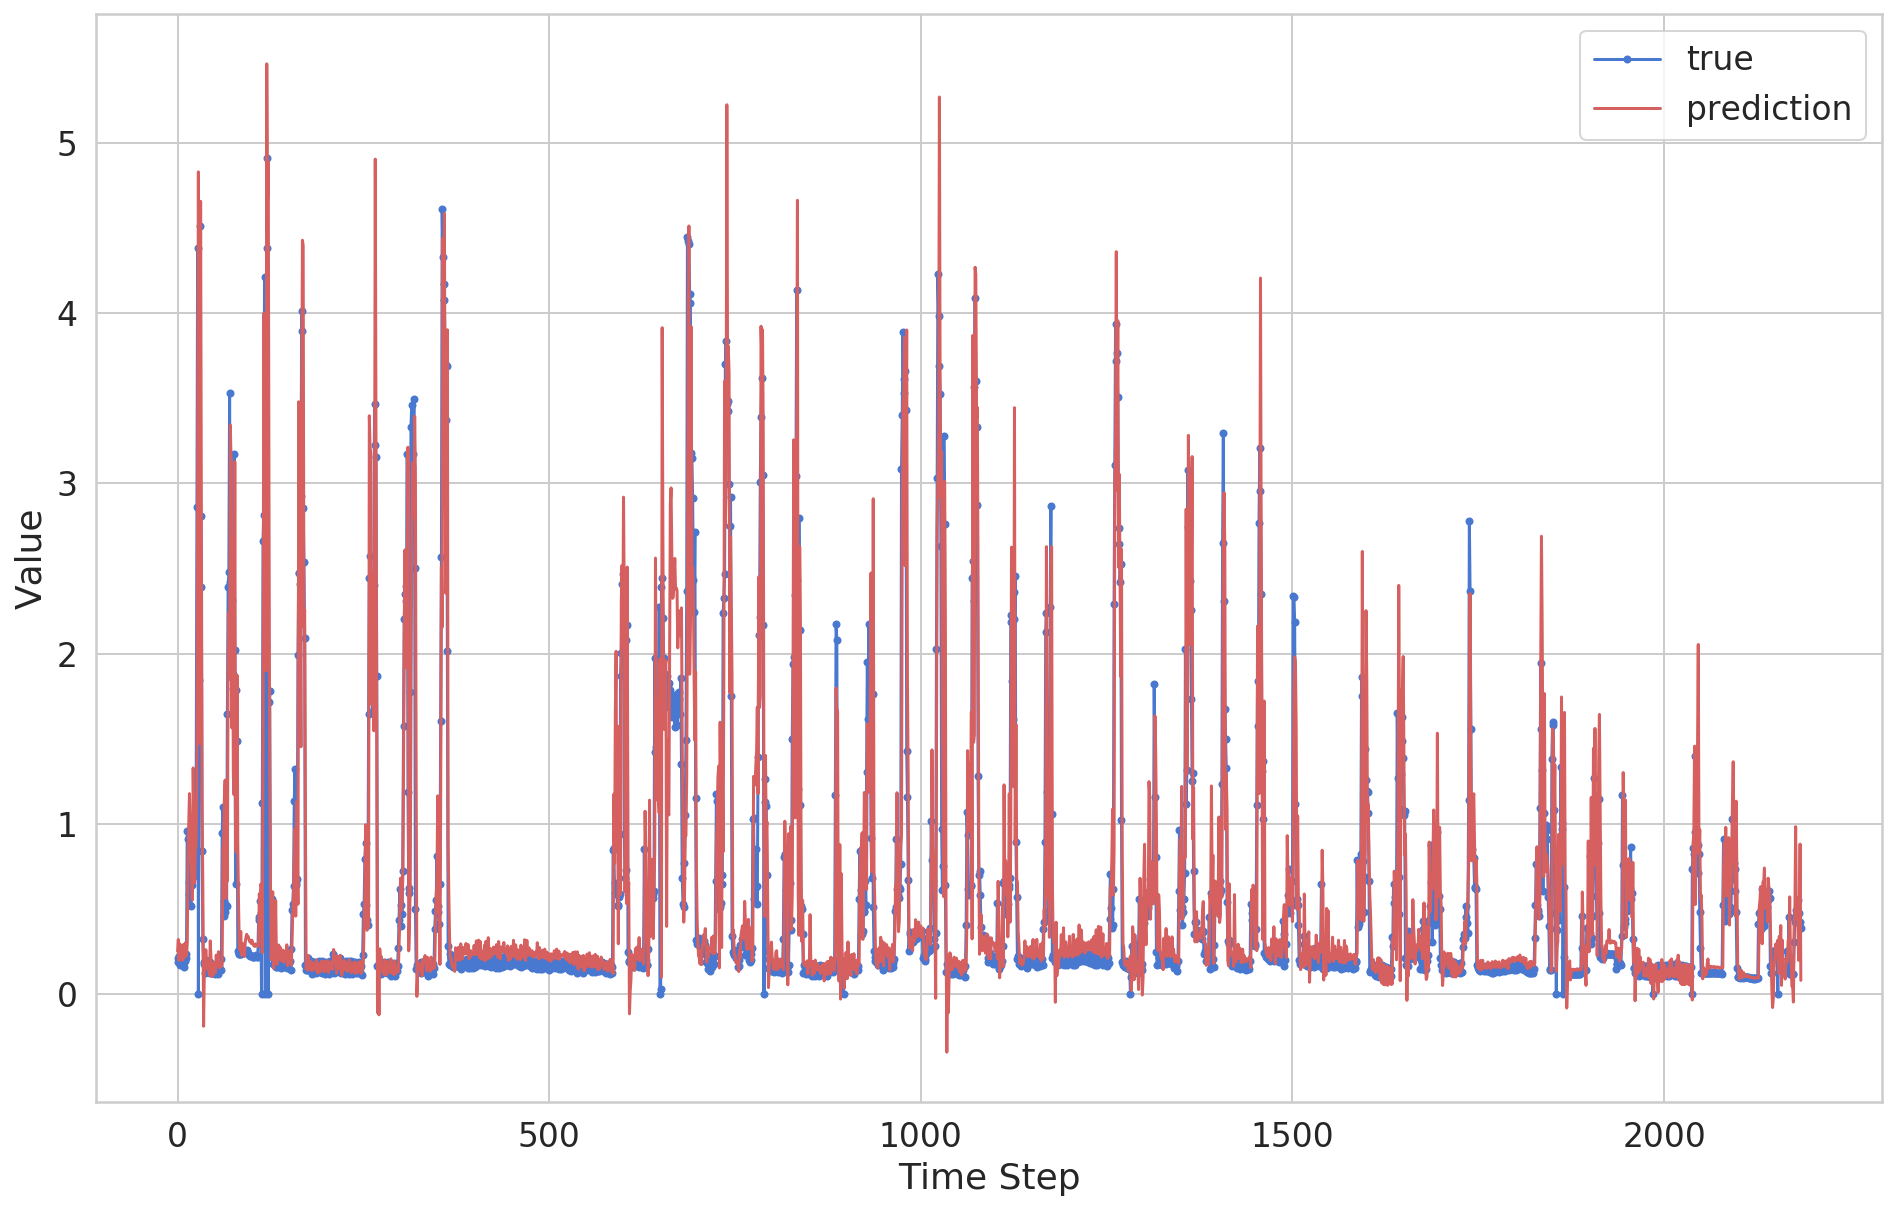

In [49]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();